## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/MOCK_DATA(2).csv')

#### Show Top 5 Records

In [3]:
df.head()

,Student_Name,Gender,Lunch_type,Sleep_type,screen_time,study_preparation,Cat_1,Cat_2,Previous_Cgpa
0,Suzie enzley,Female,acidic,full,excessive,not prepared,72,74,72
1,Brynne Lightbown,Female,basic,full,negligible,partially prepared,90,88,69
2,Aleda Alker,Female,acidic,full,negligible,fully prepared,95,93,90
3,Giles Danilchev,Male,acidic,half,negligible,partially prepared,57,44,47
4,Eziechiele Zum Felde,Male,acidic,full,excessive,partially prepared,78,75,76


#### Preparing X and Y variables

In [4]:
# Independent Feature
X = df.drop(columns=['Previous_Cgpa'],axis=1)
X = df.drop(columns=['Student_Name'],axis=1)


In [5]:
X.head()

,Gender,Lunch_type,Sleep_type,screen_time,study_preparation,Cat_1,Cat_2,Previous_Cgpa
0,Female,acidic,full,excessive,not prepared,72,74,72
1,Female,basic,full,negligible,partially prepared,90,88,69
2,Female,acidic,full,negligible,fully prepared,95,93,90
3,Male,acidic,half,negligible,partially prepared,57,44,47
4,Male,acidic,full,excessive,partially prepared,78,75,76


In [6]:
print("Categories in 'Gender' variable:     ",end=" " )
print(df['Gender'].unique())

print("Categories in 'sleep_type' variable:  ",end=" ")
print(df['Sleep_type'].unique())

print("Categories in'screen_time' variable:",end=" " )
print(df['screen_time'].unique())

print("Categories in 'Lunch_type' variable:     ",end=" " )
print(df['Lunch_type'].unique())

print("Categories in 'study_preparation' variable:     ",end=" " )
print(df['study_preparation'].unique())

# print("Categories in 'Attendance' variable:     ",end=" " )
# print(df['Attendance'].unique())

Categories in 'Gender' variable:      ['Female' 'Male']
Categories in 'sleep_type' variable:   ['full' 'half']
Categories in'screen_time' variable: ['excessive' 'negligible' 'moderate']
Categories in 'Lunch_type' variable:      ['acidic' 'basic']
Categories in 'study_preparation' variable:      ['not prepared' 'partially prepared' 'fully prepared']


In [7]:
y = df['Previous_Cgpa']

In [8]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: Previous_Cgpa, Length: 1000, dtype: int64

In [9]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [10]:
X = preprocessor.fit_transform(X)

In [11]:
X.shape


(1000, 15)

In [12]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 15), (200, 15))

#### Create an Evaluate Function to give all metrics after model Training

In [13]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [14]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000


Lasso
Model performance for Training set
- Root Mean Squared Error: 1.0094
- Mean Absolute Error: 0.8032
- R2 Score: 0.9955
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.0575
- Mean Absolute Error: 0.8295
- R2 Score: 0.9954


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.0333
- Mean Absolute Error: 0.0269
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0342
- Mean Absolute Error: 0.0287
- R2 Score: 1.0000


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 4.4331
- Mean Absolute Error: 3.5795
- R2 Score: 0.9128
-----------------------

### Results

In [15]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,1.000000
2,Ridge,0.999995
6,XGBRegressor,0.998533
1,Lasso,0.995404
7,CatBoosting Regressor,0.995024
5,Random Forest Regressor,0.994621
4,Decision Tree,0.990363
8,AdaBoost Regressor,0.989713
3,K-Neighbors Regressor,0.875920


## Linear Regression

In [17]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 100.00


## Plot y_pred and y_test

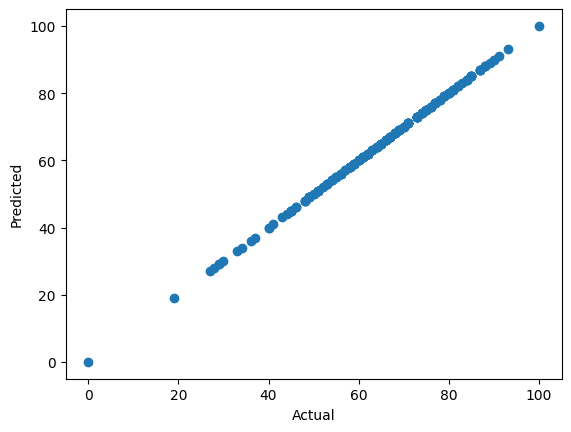

In [18]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

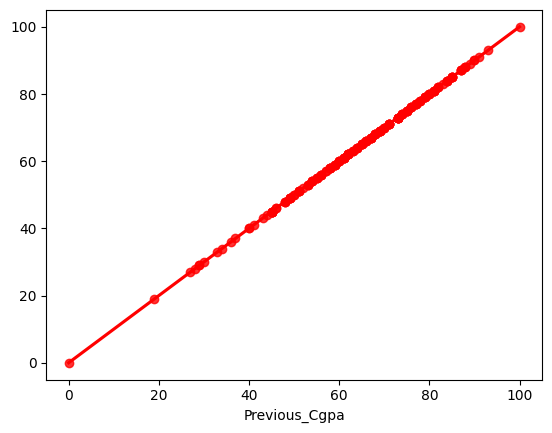

In [20]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [21]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,91.0,-1.421085e-14
737,53,53.0,-7.105427e-15
740,80,80.0,0.000000e+00
660,74,74.0,0.000000e+00
411,84,84.0,0.000000e+00
...,...,...,...
408,52,52.0,-2.131628e-14
332,62,62.0,-1.421085e-14
208,74,74.0,-1.421085e-14
613,65,65.0,-1.421085e-14
